# INFO 2950: Final Project Phase II Submission

---
## Research Questions

**Main Goal: How can we define Asian-American communities in Texas in terms of health, happiness, and financial security? and How do health, finances, community support (or the lack thereof), and identities affect an Texan Asian American's quality of life?  **

*Financial Security*
1. Do some ethnic groups of Asian-Americans (AAs) in Texas earn more than others?
2. Do younger Asian-Americans earn more money than older generations of Asian Americans living in Texas?
3. How does household size relate to duration of residency for AAs in Texas?
4. How does household size and income relate to the quality of life of a participant? 
5. How does the amount of education completed relate to income? Does this rely on whether the participant was US born?
*Happiness*
1. Are some ethnic groups more likely to be born in the United States than others?
2. What are the most dominant religions among ethnic groups in Asian-American communities in Texas?
3. How is English speaking ability related to English difficulty among AA communities in Texas?
4. Are certain religious groups within AAs more likely to experience discrimination than other relgious groups within AAs in Texas?
5. Are certain ethnic groups within AAs more likely to experience discrimination than other ethnic groups within AAs in Texas?
*Health*
1. Is smoking among Asian-American populations linked to heart disease?
2. Are older generations of AAs more likely to follow a healthy diet than younger generations of AAs in Texas?
3. How do the variables healthy diet and regular exercise correlate with eachother?
4. Does the presence of health insurance and check ups increase someone's quality of life?
*Community Support*
1. Can we predit someone's quality of life by looking at the amount of close friends they have?
2. Is religious affiliation a good predictor of quality of life?
3. What quality of life do retired people tend to have?

---

## Data Collection and Cleaning
### Data Collection
1. Go to data [landing page](https://data.austintexas.gov/City-Government/Final-Report-of-the-Asian-American-Quality-of-Life/hc5t-p62z). 
2. Click on Export > CSV.
3. Download publicly available `Final_Report_of_the_Asian_American_Quality_of_Life__AAQoL_.csv` into desired directory.

### Data Cleaning
1. Store raw data into a preliminary dataframe, `df`
2. Convert column names into snake_case

In [144]:
## <TO-DO> Paste affliated code here!



In [145]:
## load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [146]:
## Step 1
df = pd.read_csv('Final_Report_of_the_Asian_American_Quality_of_Life__AAQoL_.csv')

In [147]:
## Step 2
new_colnames = [i.lower() for i in df.columns]
new_colnames = [i.replace(" ","_") for i in new_colnames]

#### Column Names
3. Save these new column names to a new dataframe, `asian`
4. Select columns from the existing `asian` dataframe for data analysis
- [ ] Income
- [ ] Retired
- [ ] US Born
- [ ] English Speaking
- [ ] English Difficulties
- [ ] Ethnicity
- [ ] Age
- [ ] Regular Exercise
- [ ] Healthy Diet
- [ ] Heart Disease
- [ ] Drinking
- [ ] Smoking
- [ ] Cancer
- [ ] Health Insurance
- [ ] Physical Check-up
- [ ] Quality of Life
- [ ] Religion
- [ ] Gender
- [ ] Close Friends
- [ ] Discrimination
- [ ] Duration of Residency
- [ ] Household Size
- [ ] Education Completed

In [149]:
## Step 3
asian = df.copy()
asian.columns = new_colnames

In [150]:
## Step 4
asian = asian[['income', 'retired', 'us_born', 'english_speaking', 'english_difficulties', 'ethnicity','age', 'regular_exercise', 'healthy_diet', 'heart_disease', 'drinking', 'smoking',
               'cancer', 'health_insurance', 'physical_check-up', 'quality_of_life', 'religion', 'gender', 'close_friends', 'discrimination_', 'duration_of_residency', 'household_size',
              'education_completed']]
# Additional improvements to asian
asian = asian.rename(columns = {'discrimination_':'discrimination', 'physical_check-up':'physical_checkup'})

#### Cleaning Entries
5. For the corresponding columns, convert null data according to the table below:

| Column                | Modification to NaNs           |
|-----------------------|--------------------------------|
| duration_of_residency | -1                             |
| education_completed   | -1                             |
| discrimination        | 0                              |
| household_size        | 0                              |
| english_speaking      | 0                              |
| english_difficulties  | 0                              |
| retired               | 0                              |
| us_born               | 0                              |
| health_insurance      | 0                              |
| physical_checkup      | 0                              |
| regular_exercise      | 0                              |
| healthy_diet          | 0                              |
| heart_disease         | 0                              |
| income                | 0                              |
| quality_of_life       | median (5.0)                   |
| age                   | median (40.0)                  |
| close_friends         | median (3.0)                   |
| gender                | "Unknown"                      |
| ethnicity             | "Unknown"                      |
| religion              | "Unknown"                      |

In [152]:
## Step 5

#replacing NaNs with 0
asian['english_speaking'] = asian['english_speaking'].fillna(0)
    
#replacing NaNs with 0
asian['english_difficulties'] = asian['english_difficulties'].fillna(0)

#replacing NaNs with 0
asian['retired'] = asian['retired'].fillna(0)

#replacing NaNs with 0
asian['us_born'] = asian['us_born'].fillna(0)

#replacing NaNs with 0
asian['health_insurance'] = asian['health_insurance'].fillna(0)

#replacing NaNs with 0
asian['physical_checkup'] = asian['physical_checkup'].fillna(0)

#replacing NaNs with 0
asian['regular_exercise'] = asian['regular_exercise'].fillna(0)

#replacing NaNs with 0
asian['healthy_diet'] = asian['healthy_diet'].fillna(0)

#replacing NaNs with 0
asian['heart_disease'] = asian['heart_disease'].fillna(0)

#replacing NaNs with 5.0
asian['quality_of_life'] = asian['quality_of_life'].fillna(5.0)

#replacing NaNs with 0
asian['discrimination'] = asian['discrimination'].fillna(0)

#replacing NaNs with -1
asian['duration_of_residency'] = asian['duration_of_residency'].fillna(-1)

#replacing NaNs with 0 because househols_size can not be 0 because participants are counting themselves
asian['household_size'] = asian['household_size'].fillna(0)

#replacing NaNs with -1
asian['education_completed'] = asian['education_completed'].fillna(-1)

#replacing NaNs with Unknown
asian['gender'] = asian['gender'].fillna('Unknown')

#replacing NaNs with Unknown
asian['ethnicity'] = asian['ethnicity'].fillna('Unknown')

#replacing NaNs with Unknown
asian['religion'] = asian['religion'].fillna('Unknown')

#replacing NaNs with median age
asian['age'] = asian['age'].fillna(40.0)

#replacing NaNs with median number of close friends
asian['close_friends'] = asian['close_friends'].fillna(3.0)

#replacing NaNs with 0
asian['income'] = asian['income'].fillna(0)

asian.head()

,income,retired,us_born,english_speaking,english_difficulties,ethnicity,age,regular_exercise,healthy_diet,heart_disease,...,health_insurance,physical_checkup,quality_of_life,religion,gender,close_friends,discrimination,duration_of_residency,household_size,education_completed
0,0,0,0,0,0,Vietnamese,40.0,0.0,0.0,0.0,...,0,0,5.0,Unknown,Unknown,3.0,0.0,-1.0,0.0,-1.0
1,"$30,000 - $39,999",Retired,No,Not at all,Not much,Chinese,60.0,0.0,0.0,0.0,...,0,0,5.0,Buddhist,Male,3.0,0.0,0.5,6.0,13.0
2,"$0 - $9,999",0,No,Well,Much,Chinese,23.0,0.0,1.0,0.0,...,0,Yes,8.0,Buddhist,Female,4.0,0.0,11.0,3.0,16.0
3,0,Retired,No,Not well,0,Chinese,73.0,1.0,1.0,0.0,...,Yes,0,5.0,Protestant,Female,3.0,0.0,50.0,1.0,13.0
4,0,0,No,Well,Very much,Asian Indian,29.0,0.0,0.0,0.0,...,0,0,5.0,Hindu,Male,3.0,0.0,7.0,1.0,17.0


6. Replace column data to binary responses with 1s indicating ‘Yes’es and 0s indicating ‘No’es
7. Address `income` column’s formatting issues
8. Convert column data into intended data types
| Column                | Data Type                                                                          |
|-----------------------|------------------------------------------------------------------------------------|
| income                | String                                                                             |
| new_income            | int: {0 (for NaNs), 1 (0-9999), 2 (10000-19999), ..., 7 (60000-69999), 8 (70000+)} |
| retired               | int: {0 for Noes, 1 for Yeses}                                                     |
| US Born               | int: {0 for Noes, 1 for Yeses}                                                     |
| English Speaking      |                                                                                    |
| English Difficulties  |                                                                                    |
| Ethnicity             | String                                                                             |
| Age                   | int                                                                                |
| Regular Exercise      | int: {0 for Noes, 1 for Yeses}                                                     |
| Healthy Diet          | int: {0 for Noes, 1 for Yeses}                                                     |
| Heart Disease         | int: {0 for Noes, 1 for Yeses}                                                     |
| Drinking              | int: {0 for Noes, 1 for Yeses}                                                     |
| Smoking               | int: {0 for Noes, 1 for Yeses}                                                     |
| Cancer                | int: {0 for Noes, 1 for Yeses}                                                     |
| Health Insurance      | int: {0 for Noes, 1 for Yeses}                                                     |
| Physical Check-up     | int: {0 for Noes, 1 for Yeses}                                                     |
| Quality of Life       |                                                                                    |
| Religion              |                                                                                    |
| Gender                |                                                                                    |
| Close Friends         |                                                                                    |
| Discrimination        |                                                                                    |
| Duration of Residency |                                                                                    |
| Household Size        |                                                                                    |
| Education Completed   |                                                                                    |


In [153]:
## <TO-DO> Paste affliated code here!
#changing english_speaking column to be represented by floats
asian['english_speaking'].replace({'Not at all': 1, 'Not well': 2, 'Well': 3, 'Very well': 4}, inplace = True)
asian['english_speaking'] = asian['english_speaking'].astype(float, errors = 'raise')

# changing english_difficulties column to be represented by floats
asian['english_difficulties'].replace({'Not at all': 1, 'Not much': 2, 'Much': 3, 'Very much': 4}, inplace = True)
asian['english_difficuties'] = asian['english_difficulties'].astype(float, errors = 'raise')

# changing retired column to to be represented by floats
asian["retired"].replace({"Retired": 1}, inplace=True)
asian["retired"] = asian["retired"].astype(float, errors='raise')

# changing us_born column to to be represented by floats
asian["us_born"].replace({"No": 0, "Yes": 1}, inplace=True)
asian["us_born"] = asian["us_born"].astype(float, errors='raise')

# changing health_insurance column 
asian['health_insurance'].replace({"Yes": "1"}, inplace=True)

# chaning physical_checkup column 
asian["physical_checkup"].replace({"Yes": "1"}, inplace=True)
asian['ohysical_checkup'] = asian['physical_checkup'].astype(float, errors = 'raise')

# changing income column entries to be represented by integers
asian['income'].replace({'$0 - $9,999': 1, '$10,000 - $19,999': 2, '$20,000 - $29,999': 3, '$30,000 - $39,999': 4, 
                        '$40,000 - $49,999': 5, '$50,000 - $59,999': 6, '$60,000 - $69,999': 7, '$70,000 and over': 8},
                       inplace = True)

asian.head()

,income,retired,us_born,english_speaking,english_difficulties,ethnicity,age,regular_exercise,healthy_diet,heart_disease,...,quality_of_life,religion,gender,close_friends,discrimination,duration_of_residency,household_size,education_completed,english_difficuties,ohysical_checkup
0,0,0.0,0.0,0.0,0,Vietnamese,40.0,0.0,0.0,0.0,...,5.0,Unknown,Unknown,3.0,0.0,-1.0,0.0,-1.0,0.0,0.0
1,4,1.0,0.0,1.0,2,Chinese,60.0,0.0,0.0,0.0,...,5.0,Buddhist,Male,3.0,0.0,0.5,6.0,13.0,2.0,0.0
2,1,0.0,0.0,3.0,3,Chinese,23.0,0.0,1.0,0.0,...,8.0,Buddhist,Female,4.0,0.0,11.0,3.0,16.0,3.0,1.0
3,0,1.0,0.0,2.0,0,Chinese,73.0,1.0,1.0,0.0,...,5.0,Protestant,Female,3.0,0.0,50.0,1.0,13.0,0.0,0.0
4,0,0.0,0.0,3.0,4,Asian Indian,29.0,0.0,0.0,0.0,...,5.0,Hindu,Male,3.0,0.0,7.0,1.0,17.0,4.0,0.0


---

## Data Description
The observations are the Asian-Americans surveyed in Austin, Texas. The attributes are a range of quality of life measurements. This dataset will help us understand the rapid growth rate and unique challenges as a new immigrant group calls for a better understanding of the social and health needs of the Asian American population. This dataset was funded by the City of Austin’s Public Information Office. Researchers and participants guided the observation of data. During the study, participants elevated their responses by adding “respect and appreciation of diverse cultures and acknowledgement of the legacy of the Asian community in Austin. The kind of data that was recorded focused on the project's goal to improve the city of Austin’s Asian American resources on health, housing,  culture, civic engagement, and economic development. The data came to formation through a three-year community engagement process. Commissioners, consultants and City staff worked with partner agencies and individual volunteers to meet Asian American community members where they live, work and play. More than 3,350 individuals took one of two surveys during the initiative either online or in-person at a variety of locations throughout the city, “Conversation Over Tea,” and other City of Austin hosted meetings to facilitate dialogue and share anecdotes about their lives. Additionally, “travel booths” were present at various events throughout the city engaging hundreds of Asian Americans. Participation included almost every ZIP code within the city and adjacent areas. The people involved were aware of the data collection. They were surprised to learn that the data was to be used for the City of Austin to hear about their dreams, challenges and contributions. A raw source to the data can be found [here](https://data.austintexas.gov/City-Government/Final-Report-of-the-Asian-American-Quality-of-Life/hc5t-p62z), under Export > CSV configurations.

---

## Data Limitations
Limited amount of quantitative data values will make it difficult to generate traditional-looking scatter plots. Questions asked to participants had responses of different scales. Data collected is limited to representing the attitudes of Asian-Americans living in Texas. Certain ethnic groups dominate over others which may lead to skewed results when extrapolating quality of life measurements. Some response variables will be affected by confounding variables such as different cultural aspects among sub-ethnic groups. (e.g. some ethnic groups have leaner diets which would impact conclusions drawn.)

---

## Exploratory Data Analysis
### Outline

#### Scatterplots
- [ ] Household Size vs Duration of Residency

#### Bar Charts
- [ ] Median Income Brackets per Ethnicity
- [ ] Percentage of US-born per Ethnicity
- [ ] Percentage of Religion per Ethnicity
- [ ] Percentage of Discrimination per Ethnicity
- [ ] Percentage of Discrimination per Religion

#### Histograms
- [ ] For all columns 

#### Boxplots 
- [ ] Income vs Age

#### Correlation
- [ ] Visualizing correlation

### Sample Summary Statistics

Median household income for Asian Americans living in Austin, Texas

<AxesSubplot:title={'center':'age'}, xlabel='income'>

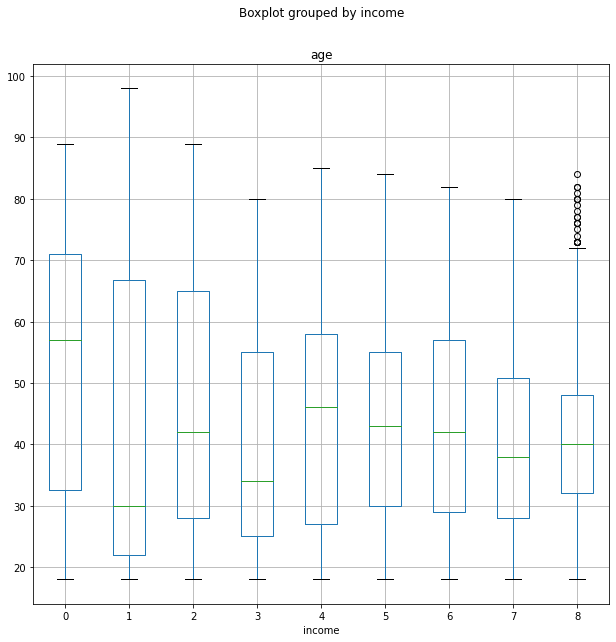

In [175]:
# boxplot for age and income 

asian.boxplot('age', by = 'income', figsize = (10,10) )

Text(0, 0.5, 'Household size')

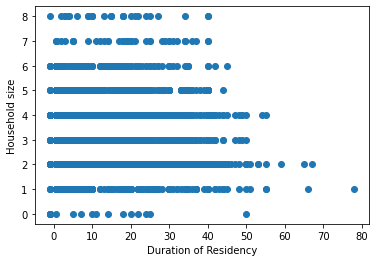

In [195]:
# scatterplot of household size vs. duration of residency
plt.scatter(asian['duration_of_residency'], asian['household_size'])
plt.xlabel('Duration of Residency')
plt.ylabel('Household size')
         

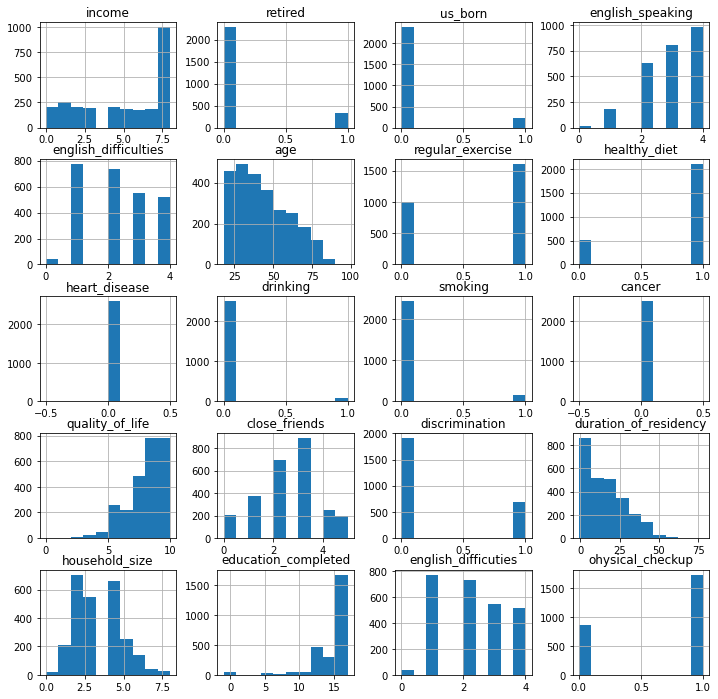

In [208]:
# histograms of variables
asian.hist(bins = 10, figsize = (12,12))
# plt.tight_layout()
plt.show()

In [215]:
# calculating correlation

asian.corr()

,income,retired,us_born,english_speaking,english_difficulties,age,regular_exercise,healthy_diet,heart_disease,drinking,smoking,cancer,quality_of_life,close_friends,discrimination,duration_of_residency,household_size,education_completed,english_difficuties,ohysical_checkup
income,1.000000,-0.238977,0.003499,0.343087,-0.035707,-0.141135,0.016050,0.026216,NaN,-0.028670,-0.002639,NaN,0.278677,0.062921,0.089789,0.159636,0.000727,0.308161,-0.035707,0.150122
retired,-0.238977,1.000000,-0.100853,-0.238771,0.015846,0.608939,0.147189,0.101217,NaN,0.008543,-0.057142,NaN,-0.115505,-0.039921,-0.067279,0.256329,0.017547,-0.107011,0.015846,0.085424
us_born,0.003499,-0.100853,1.000000,0.293404,-0.199708,-0.278161,0.008366,-0.060196,NaN,0.038025,0.024052,NaN,0.074493,0.125503,0.154638,0.246968,0.017460,-0.031602,-0.199708,0.004526
english_speaking,0.343087,-0.238771,0.293404,1.000000,-0.161326,-0.390865,0.075681,0.034682,NaN,-0.033664,-0.017259,NaN,0.380225,0.180952,0.094912,0.211111,-0.073892,0.322358,-0.161326,0.117759
english_difficulties,-0.035707,0.015846,-0.199708,-0.161326,1.000000,0.009518,-0.009344,-0.013872,NaN,0.013721,-0.017757,NaN,-0.139793,-0.044762,-0.060177,-0.207146,0.016810,0.018017,1.000000,-0.060784
age,-0.141135,0.608939,-0.278161,-0.390865,0.009518,1.000000,0.118480,0.101672,NaN,0.007792,-0.032684,NaN,-0.131927,-0.135521,-0.063427,0.442361,0.091341,-0.214155,0.009518,0.143790
regular_exercise,0.016050,0.147189,0.008366,0.075681,-0.009344,0.118480,1.000000,0.361439,NaN,-0.009285,-0.040040,NaN,0.164578,0.031563,0.000592,0.107369,-0.017412,0.046430,-0.009344,0.077300
healthy_diet,0.026216,0.101217,-0.060196,0.034682,-0.013872,0.101672,0.361439,1.000000,NaN,-0.034722,-0.061777,NaN,0.139213,0.013591,-0.038283,0.038094,-0.019150,0.096571,-0.013872,0.102575
heart_disease,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
drinking,-0.028670,0.008543,0.038025,-0.033664,0.013721,0.007792,-0.009285,-0.034722,NaN,1.000000,0.226438,NaN,-0.064327,-0.029376,-0.000214,0.007208,-0.006121,-0.075193,0.013721,0.002393


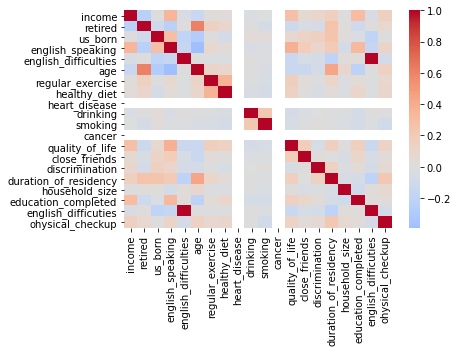

In [214]:
#visualising correlations
sns.heatmap(asian.corr(), center=0, cmap='coolwarm' )
plt.show()

### Sample Relevant Plots

Distribution of ethnicities among Asian-Americans living in Austin, Texas

In [162]:
## <TO-DO> Write affliated code here!



Distribution of religious groups by ethnicity in Asian-American communities in Austin, Texas

In [163]:
## <TO-DO> Write affliated code here!



---

## Questions for Reviewers

